In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Text(0.5, 1.0, 'Loss function over parameter space')

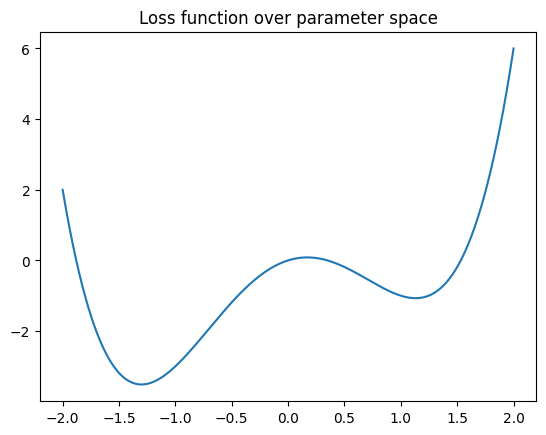

In [27]:
# quartic potential with a local minimum:
def V(x):
    return x**4 - 3*x**2 + x

# plot it:
x = np.linspace(-2, 2, 1000)
plt.plot(x, V(x))
plt.title("Loss function over parameter space")

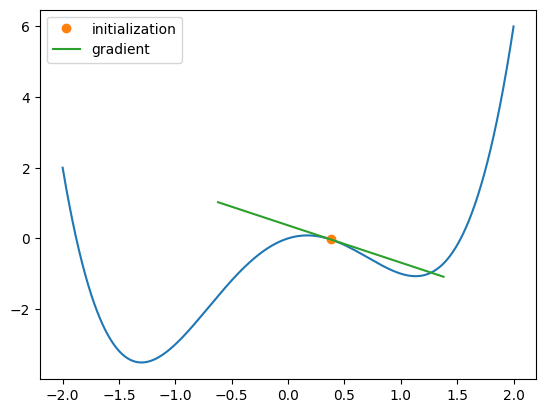

In [28]:
# plt.title("Loss function over parameter space")
# random initialization of parameters:
# INITIALIZATION MATTERS:
x0 = 2*np.random.rand() #- 1
plt.plot(x, V(x))
plt.plot(x0, V(x0), 'o', label="initialization")
# and the gradient:
# Draw a tangent line at x0:
x1 = np.linspace(x0-1, x0+1, 1000)
m = 4*x0**3 - 6*x0 + 1
y1 = V(x0) + m*(x1 - x0)
plt.plot(x1, y1, label="gradient")
plt.legend()

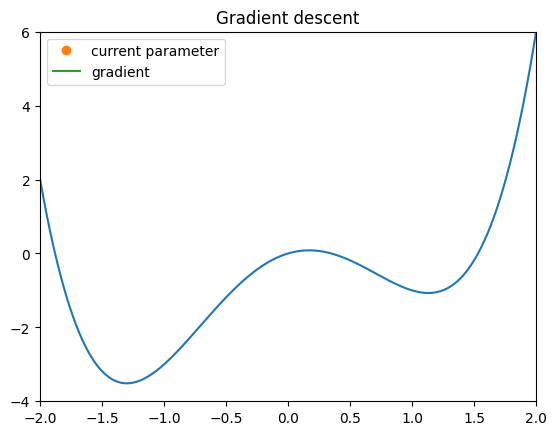

In [29]:
# Animate a gradient descent:
# Initialize the plot:
fig, ax = plt.subplots()
ax.plot(x, V(x))
ax.set_title("Gradient descent")
ax.set_xlim(-2, 2)
ax.set_ylim(-4, 6)
line, = ax.plot([], [], 'o', label="current parameter")
grad, = ax.plot([], [], label="gradient")
ax.legend()

# Initialize the parameters:
x = 2*np.random.rand() - 1
lr = 0.1
# Initialize the animation:
def init():
    line.set_data([], [])
    grad.set_data([], [])
    return line, grad
# Update the animation:
def update(i):
    global x
    # Update the parameter:
    x -= lr*(4*x**3 - 6*x + 1)
    # Update the plot:
    line.set_data(x, V(x))
    grad.set_data(x, 0)
    ax.set_title(f"Gradient step {i}/50")
    return line, grad
# Run the animation:
ani = animation.FuncAnimation(fig, update, init_func=init, frames=50, interval=50, blit=True)
# plt.show()

In [30]:
ani.save(f"gradient_descent_lr={lr}.gif", writer="imagemagick", fps=10)

MovieWriter imagemagick unavailable; using Pillow instead.
/tmp/ipykernel_3405/1302108412.py:26: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, V(x))
/tmp/ipykernel_3405/1302108412.py:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  grad.set_data(x, 0)
